In [1]:
# !pip install geopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime
import calendar
from math import sin, cos, sqrt, atan2, radians,asin
import folium
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap
from folium.plugins import TimestampedGeoJson
from folium.plugins import MarkerCluster
from geopy.distance import great_circle
import matplotlib.dates as mdates
from datetime import timedelta
import datetime as dt
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')
import folium
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle
from geopy.distance import geodesic

In [59]:
# df = pd.read_csv('./Edwisor Cab Fare/train_cab.csv' ,nrows = 16067, parse_dates=['pickup_datetime'])

df = pd.read_csv('C:/Users/nsida/Cab fare prediction//train_cab.csv', nrows= 16066, encoding = "utf-8")

date1 = pd.to_datetime(df['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC', errors='coerce')
date2 = pd.to_datetime(df['pickup_datetime'],format='%Y-%m-%d UTC', errors='coerce')
    
df['pickup_datetime'] = date1.combine_first(date2)

data = df.dropna()
df.dtypes
# de1.head(10)

fare_amount          object        
pickup_datetime      datetime64[ns]
pickup_longitude     float64       
pickup_latitude      float64       
dropoff_longitude    float64       
dropoff_latitude     float64       
passenger_count      float64       
dtype: object

In [60]:
# Covert the Data types
del df['fare_amount'][1123]
#Deleting the row with Special Charater

# TO DO - Watch How to remove the Check if there is any special characters(Bone) inside the Fish(Column) to ensure no Frustration
df['fare_amount'] = pd.to_numeric(df['fare_amount'])
df.dtypes

fare_amount          float64       
pickup_datetime      datetime64[ns]
pickup_longitude     float64       
pickup_latitude      float64       
dropoff_longitude    float64       
dropoff_latitude     float64       
passenger_count      float64       
dtype: object

In [61]:
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_day']= df['pickup_datetime'].apply(lambda x:x.day)
df['pickup_hour']= df['pickup_datetime'].apply(lambda x:x.hour)
# df['pickup_day_of_week']= df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
# df['pickup_month']=df['pickup_datetime'].apply(lambda x:x.month)
# df['pickup_year']=df['pickup_datetime'].apply(lambda x:x.year)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009-06-15,15.0,17.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010-01-05,5.0,16.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011-08-18,18.0,0.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012-04-21,21.0,4.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010-03-09,9.0,7.0


In [64]:
df_without_date = df.drop('pickup_fare_amount', axis =0)

KeyError: "['pickup_fare_amount'] not found in axis"

In [63]:
# Checking for Null Values
df[pd.isna(df)].sum()

fare_amount          0.0
pickup_datetime      0.0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count      0.0
pickup_date          0.0
pickup_day           0.0
pickup_hour          0.0
dtype: float64

In [6]:
print('Old Size is %d' % len(df))
df['fare_amount'] = df['fare_amount'].where(df['fare_amount']>=0)
print('New Size is %d ' % len(df))

Old Size is 16066
New Size is 16066 


Text(0.5, 1.0, 'Histogram')

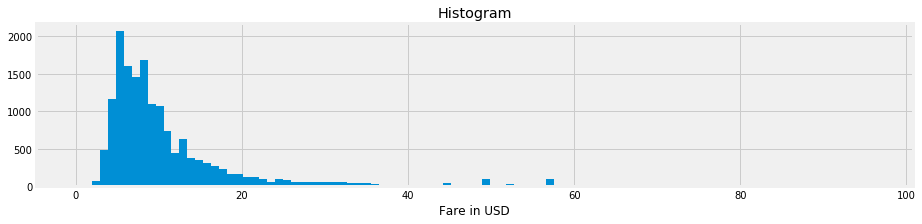

In [7]:
#Plotting a Histogram for Analyzing the Fare Amount
df[df.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('Fare in USD')
plt.title("Histogram")
#Here we observed that most of the Cab fare are between 0-20 $
# There is almost no Cab who's fare is greater than 60$

Text(0.5, 1.0, 'Distribution of Plot Fare')

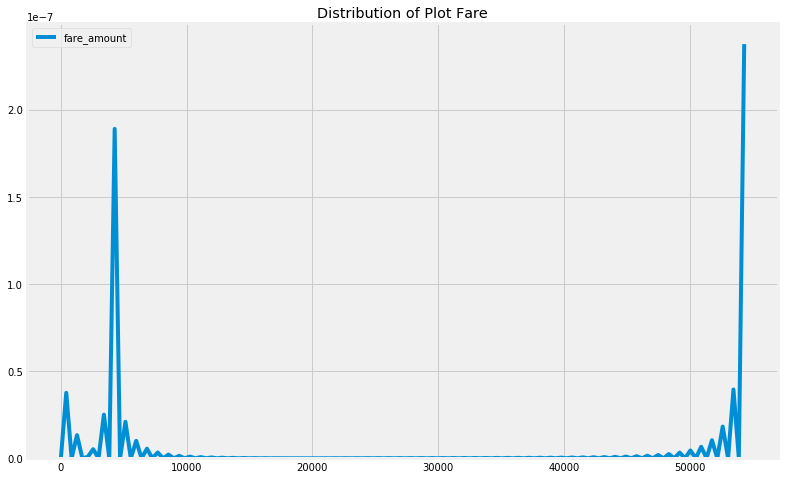

In [8]:
# Using Seaborn Plotting the same Fare or Trip amount
plt.figure(figsize=(12,8))
sns.kdeplot(df['fare_amount']).set_title("Distribution of Plot Fare")

Text(0.5, 1.0, 'Distribution of Plot Fare on Logaramatic Scale')

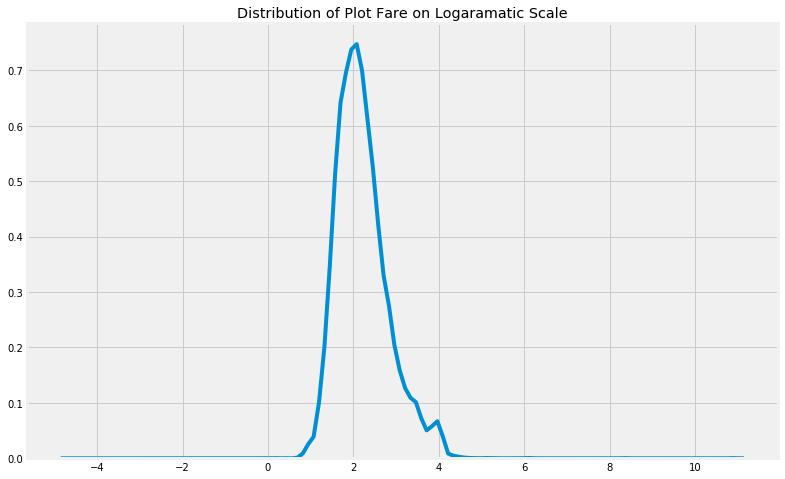

In [9]:
plt.figure(figsize=(12,8))
sns.kdeplot(np.log(df['fare_amount'].values)).set_title("Distribution of Plot Fare on Logaramatic Scale")

# Let us look at Geographical Features and Fare Amount
Distribution of Pickup and Dropoff Lat Lng



In [10]:
print(f">> Data Available since {df.fare_amount.min()}")
print(f">> Data Available upto {df.fare_amount.max()}")

>> Data Available since 0.0
>> Data Available upto 54343.0


In [11]:
# Checking for Null values
df[pd.isnull(df)].sum()

fare_amount          0.0
pickup_datetime      0.0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count      0.0
pickup_date          0.0
pickup_day           0.0
pickup_hour          0.0
dtype: float64

# Exploratory Data Analysis

Let's Plot a HeatMap with Seaborn to see the correlation between the Variables

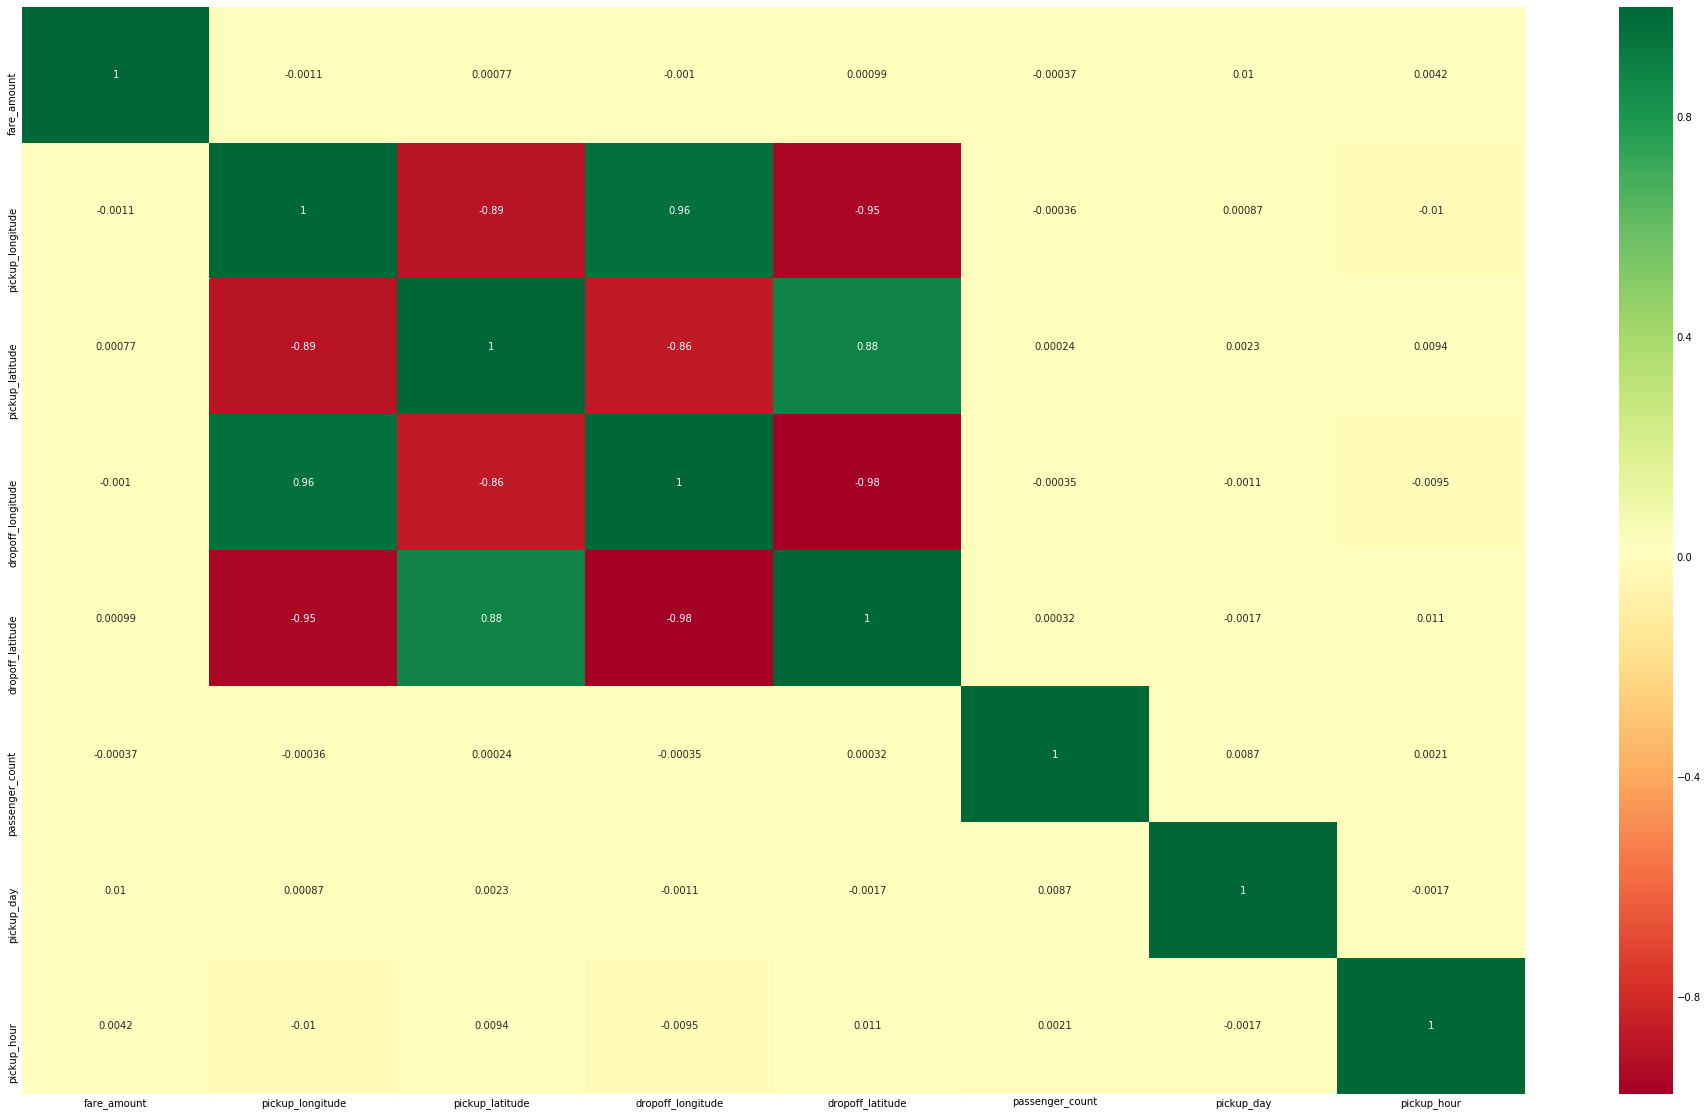

In [12]:
corrmat = df.corr()
top_corr_features = corrmat.index
top_corr_features
plt.figure(figsize=(30,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
# Checking the Distribution of the Data
df.dtypes
print("Shape of the Data",df.shape)
df1 = df['pickup_datetime']

Shape of the Data (16066, 10)


In [14]:
traintypes = {'fare_amount': 'float32',
              'pickup_datetime': 'str', 
              'pickup_longitude': 'float32',
              'pickup_latitude': 'float32',
              'dropoff_longitude': 'float32',
              'dropoff_latitude': 'float32',
              'passenger_count': 'uint8'}

cols = list(traintypes.keys())

In [15]:
df['Datetime']=pd.to_datetime('2009-06-15 17:26:21 UTC',format='%Y-%m-%d %H:%M:%S UTC')

In [16]:
df.dtypes

fare_amount          float64       
pickup_datetime      datetime64[ns]
pickup_longitude     float64       
pickup_latitude      float64       
dropoff_longitude    float64       
dropoff_latitude     float64       
passenger_count      float64       
pickup_date          object        
pickup_day           float64       
pickup_hour          float64       
Datetime             datetime64[ns]
dtype: object

In [17]:
# Now we will be taking a look at Geographical Features and their Relationship with Fare amount
# Distribution of Pickup and Dropoff Latitude Longitude

In [18]:
print('Range of Pickup Latitude is ', min(df['pickup_latitude']), max(df['pickup_latitude']))

Range of Pickup Latitude is  -74.006893 401.083332


In [19]:
print('Range of Pickup Latitude is ', min(df['dropoff_latitude']), max(df['dropoff_longitude']))

Range of Pickup Latitude is  -74.006377 40.802437


The data is for Taxi Rides in Newyork, whose center lat, lng is at ((40,-74).The range of dropoff and pickup latitudes indicates lot of outlier locations in the train data.



In [20]:
# Before we move ahead and Identify outliertye location, let us read the test data and see what the boundaries are
test = pd.read_csv('C:/Users/nsida/Cab fare prediction/test.csv')
print("Longitude Boundaries in the test data")
min(test.pickup_longitude.min(), test.dropoff_longitude.min()),max(test.pickup_longitude.max(), test.dropoff_longitude.max())

Longitude Boundaries in the test data


(-74.263242, -72.986532)

In [21]:
print("Latitude Boundaries in the test data")
min(test.pickup_latitude.min(), test.dropoff_latitude.min()),max(test.pickup_latitude.max(), test.dropoff_latitude.max())

Latitude Boundaries in the test data


(40.568973, 41.709555)

In [22]:
# Drawing a Map on top of ZGood 

# !pip install gmplot
import gmplot 
gmap3 = gmplot.GoogleMapPlotter(30.3164945, 
                                78.03219179999999, 13) 

gmap3.scatter(df['pickup_latitude'],df['pickup_longitude'] , '# FF0000', 
                              size = 40, marker = False ) 
  
# Plot method Draw a line in 
# between given coordinates 
gmap3.plot(df['dropoff_latitude'], df['dropoff_longitude'],  
           'cornflowerblue', edge_width = 2.5) 
  
gmap3.draw( "C://Users/nsida/map13.html")

In [23]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour
count,16038.000000,16066.000000,16066.000000,16066.000000,16066.000000,16012.000000,16065.000000,16065.000000
mean,15.018743,-72.462691,39.914675,-72.462233,39.897852,2.625070,15.669966,13.498288
std,430.514553,10.578706,6.826797,10.575384,6.187276,60.844122,8.683470,6.519919
min,0.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000,1.000000,0.000000
25%,6.000000,-73.992155,40.734935,-73.991182,40.734647,1.000000,8.000000,9.000000
50%,8.500000,-73.981697,40.752605,-73.980170,40.753566,1.000000,16.000000,14.000000
75%,12.500000,-73.966837,40.767381,-73.963642,40.768015,2.000000,23.000000,19.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000,31.000000,23.000000


In [24]:
# Let us set the boundary for the train data also based on test data latitude and longitude boundaries.
# We will mark the locations as 1 and remove them for further analysis
boundary={'min_lng':-74.263242,
              'min_lat':40.568973,
              'max_lng':-72.986532,
              'max_lat':41.709555}

# We will also be checking if there any cases where the latitude longitude is zero, if Yes. How many such cases are there in our Data?


In [25]:
df[(df.pickup_latitude == 0) | (df.pickup_longitude == 0) | (df.dropoff_latitude == 0) | (df.dropoff_longitude == 0)].shape

(326, 11)

# So we got to know there are 326 rows having their latitude and longitude as zero. These are Trips or rides that mistakenly got their latitudes and Longitudes zero for some reason. Could be due to Malfunctioning of the System or some other reasons too. We don't know

In [26]:
df.loc[~((df.pickup_longitude >= boundary['min_lng'] ) & (df.pickup_longitude <= boundary['max_lng']) &
            (df.pickup_latitude >= boundary['min_lat']) & (df.pickup_latitude <= boundary['max_lat']) &
            (df.dropoff_longitude >= boundary['min_lng']) & (df.dropoff_longitude <= boundary['max_lng']) &
            (df.dropoff_latitude >=boundary['min_lat']) & (df.dropoff_latitude <= boundary['max_lat'])),'is_outlier_loc']=1
df.loc[((df.pickup_longitude >= boundary['min_lng'] ) & (df.pickup_longitude <= boundary['max_lng']) &
            (df.pickup_latitude >= boundary['min_lat']) & (df.pickup_latitude <= boundary['max_lat']) &
            (df.dropoff_longitude >= boundary['min_lng']) & (df.dropoff_longitude <= boundary['max_lng']) &
            (df.dropoff_latitude >=boundary['min_lat']) & (df.dropoff_latitude <= boundary['max_lat'])),'is_outlier_loc']=0

print("Outlier vs Non Outlier Counts")
print(df['is_outlier_loc'].value_counts())

# So now let's Drop some rows, where location is an outlier
df = df.loc[df['is_outlier_loc']==0]
df.drop(['is_outlier_loc'], axis=1, inplace=True)

Outlier vs Non Outlier Counts
0.0    15713
1.0    353  
Name: is_outlier_loc, dtype: int64


In [27]:
# Plot Heatmap of Pickups and Dropoffs within NYC
df.shape

(15713, 11)

Text(0.5, 1.0, 'Dropoff Within the New York City Border')

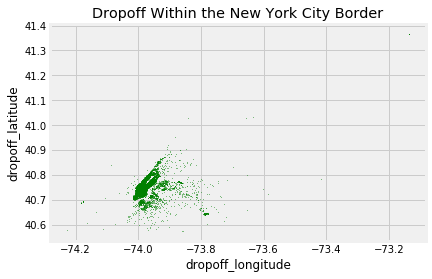

In [28]:
# Plot Heatmap of Pickups and Dropoffs within NYC we set the Borders as-
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

df.plot(kind = 'scatter', x='dropoff_longitude', y='dropoff_latitude', 
       color='green', s=0.2, alpha=.6)
plt.title("Dropoff Within the New York City Border")


(-74.03, -73.75)

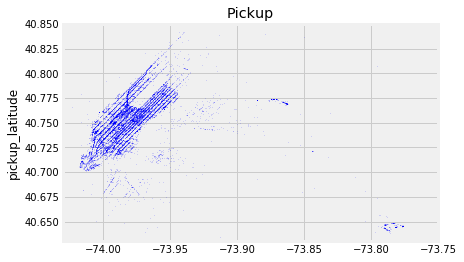

In [29]:
df.plot(kind='scatter', x = 'pickup_longitude', y='pickup_latitude', 
       color='blue',
       s=0.02, alpha=0.6)
plt.title("Pickup")
plt.xlabel("")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

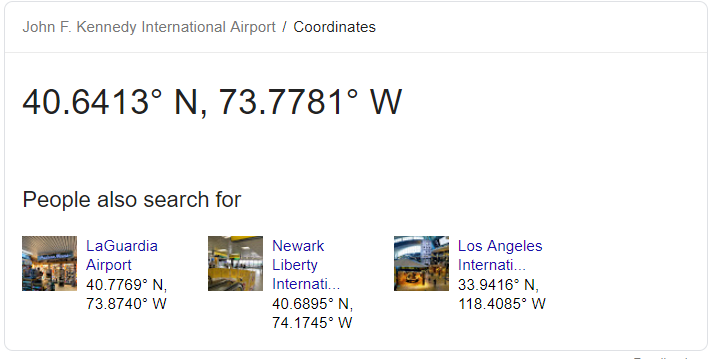

We can see lots of pickups around JFK and LaGuardia Airport, We can also see pickups at manhattan around that place. 

In [30]:
# Let's round the pickup and Dropoff latitude longitude to 3 decimal places
df['pickup_latitude_round3']=df['pickup_latitude'].apply(lambda x:round(x,3))
df['pickup_longitude_round3']=df['pickup_longitude'].apply(lambda x:round(x,3))
df['dropoff_latitude_round3']=df['dropoff_latitude'].apply(lambda x:round(x,3))
df['dropoff_longitude_round3']=df['dropoff_longitude'].apply(lambda x:round(x,3))
pickup_fare_amount=df.groupby(['pickup_latitude_round3','pickup_longitude_round3'])['fare_amount'].mean().reset_index().rename(columns={'fare_amount':'avg_fare'})
pickup_fare_amount.head()

,pickup_latitude_round3,pickup_longitude_round3,avg_fare
0,40.572,-74.229,3.7
1,40.604,-73.780,5.5
2,40.609,-74.090,7.7
3,40.615,-73.944,5.5
4,40.617,-73.929,12.5


In [31]:
JFK={'min_lng':-73.8352,
     'min_lat':40.6195,
     'max_lng':-73.7401, 
     'max_lat':40.6659}
JFK_center=[40.6437,-73.7900]
# Get all pickups to JFK
JFK_data=df.loc[(df.pickup_latitude>=JFK['min_lat']) & (df.pickup_latitude<=JFK['max_lat'])]
JFK_data=JFK_data.loc[(df.pickup_longitude>=JFK['min_lng']) & (df.pickup_longitude<=JFK['max_lng'])]

print("Number of Trips with Pickups from JFK",JFK_data.shape[0])

JFK_dropoff=df.loc[(df.dropoff_latitude>=JFK['min_lat']) & (df.dropoff_latitude<=JFK['max_lat'])]
JFK_dropoff=JFK_dropoff.loc[(df.dropoff_longitude>=JFK['min_lng']) & (df.dropoff_longitude<=JFK['max_lng'])]

print("Number of Trips with Dropoffs to JFK",JFK_dropoff.shape[0])


# Create a folium map with JFK as the center 
m=folium.Map(location =JFK_center,zoom_start = 10,)
folium.Marker(location=JFK_center, popup='JFK Airport',icon=folium.Icon(color='black')).add_to(m)

mc = MarkerCluster().add_to(m)
#Add markers in blue for each pickup location and line between JFK and Pickup location over time. The thickness of line indicates the fare_amount

for index,row in JFK_data.iterrows():
    folium.Marker([row['dropoff_latitude'],row['dropoff_longitude']]).add_to(m)

Number of Trips with Pickups from JFK 245
Number of Trips with Dropoffs to JFK 119


In [32]:
# As we can see, the fare amount is much higher when pickup is from JFK.

Text(0.5, 1.0, 'Fare Amount Distribution')

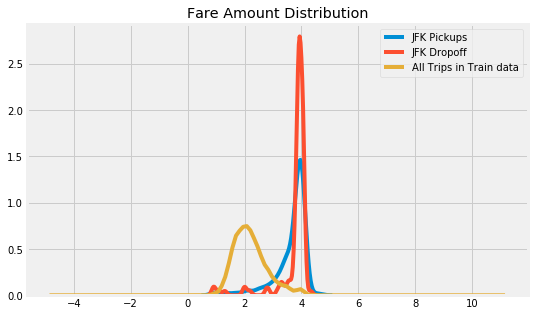

In [33]:
# We would like to know what is the average fare of trips when the pickups is around JFK
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(JFK_data['fare_amount'].values),label='JFK Pickups')
sns.kdeplot(np.log(JFK_dropoff['fare_amount'].values),label='JFK Dropoff')
sns.kdeplot(np.log(df['fare_amount'].values),label='All Trips in Train data')
plt.title("Fare Amount Distribution")

In [34]:
del JFK_data
del JFK
del JFK_dropoff

In [35]:
## Based on the above, let us create a function to see whether pickup or dropoff is an Airport. 


def isAirport(latitude,longitude,airport_name='JFK'):
    if airport_name=='JFK':
        boundary={'min_lng':-73.8352,
     'min_lat':40.6195,
     'max_lng':-73.7401, 
     'max_lat':40.6659}
    elif airport_name=='EWR':
        boundary={
            'min_lng':-74.1925,
            'min_lat':40.6700, 
            'max_lng':-74.1531, 
            'max_lat':40.7081

        }
    elif airport_name=='la guardia':
        boundary={'min_lng':-73.8895, 
                  'min_lat':40.7664, 
                  'max_lng':-73.8550, 
                  'max_lat':40.7931
                 }
    if latitude>=boundary['min_lat'] and latitude<=boundary['max_lat']:
        if longitude>=boundary['min_lng'] and longitude<=boundary['max_lng']:
            return 1
    else:
        return 0
        




nyc_airports={'JFK':{'min_lng':-73.8352,
     'min_lat':40.6195,
     'max_lng':-73.7401, 
     'max_lat':40.6659},
              
    'EWR':{'min_lng':-74.1925,
            'min_lat':40.6700, 
            'max_lng':-74.1531, 
            'max_lat':40.7081

        },
    'LaGuardia':{'min_lng':-73.8895, 
                  'min_lat':40.7664, 
                  'max_lng':-73.8550, 
                  'max_lat':40.7931
        
    }
    
}
def isAirport(latitude,longitude,airport_name='JFK'):
    
    if latitude>=nyc_airports[airport_name]['min_lat'] and latitude<=nyc_airports[airport_name]['max_lat'] and longitude>=nyc_airports[airport_name]['min_lng'] and longitude<=nyc_airports[airport_name]['max_lng']:
        return 1
    else:
        return 0
        

In [36]:
df['is_pickup_JFK']=df.apply(lambda row:isAirport(row['pickup_latitude'],row['pickup_longitude'],'JFK'),axis=1)
df['is_dropoff_JFK']=df.apply(lambda row:isAirport(row['dropoff_latitude'],row['dropoff_longitude'],'JFK'),axis=1)

In [37]:
(df['is_dropoff_JFK'].where(df['is_dropoff_JFK']==1))

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
12      NaN
13      NaN
14      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
27      NaN
28      NaN
29      NaN
30      NaN
31      NaN
32      NaN
         ..
16035   NaN
16036   NaN
16037   NaN
16038   NaN
16039   NaN
16040   NaN
16041   NaN
16042   NaN
16043   NaN
16044   NaN
16045   NaN
16046   NaN
16047   NaN
16048   NaN
16049   NaN
16050   NaN
16051   NaN
16052   NaN
16053   NaN
16054   NaN
16055   NaN
16057   NaN
16058   NaN
16059   NaN
16060   NaN
16061   NaN
16062   NaN
16063   NaN
16064   NaN
16065   NaN
Name: is_dropoff_JFK, Length: 15713, dtype: float64

In [38]:
len(df['is_pickup_JFK'])

15713

In [39]:
df['is_pickup_EWR']=df.apply(lambda row:isAirport(row['pickup_latitude'],row['pickup_longitude'],'EWR'),axis=1)
df['is_dropoff_EWR']=df.apply(lambda row:isAirport(row['dropoff_latitude'],row['dropoff_longitude'],'EWR'),axis=1)

In [40]:
df['is_dropoff_EWR'].head(100)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
12     0
13     0
14     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
27     0
28     0
29     0
30     0
31     0
32     0
      ..
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
Name: is_dropoff_EWR, Length: 100, dtype: int64

In [41]:
df['is_pickup_la_guardia']=df.apply(lambda row:isAirport(row['pickup_latitude'],row['pickup_longitude'],'LaGuardia'),axis=1)
df['is_dropoff_la_guardia']=df.apply(lambda row:isAirport(row['dropoff_latitude'],row['dropoff_longitude'],'LaGuardia'),axis=1)

In [42]:
# Trip Distance

#calculate trip distance in miles
def distance(lat1, lat2, lon1,lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [43]:
df['trip_distance']=df.apply(lambda row:distance(row['pickup_latitude'],row['dropoff_latitude'],row['pickup_longitude'],row['dropoff_longitude']),axis=1)


Text(0.5, 1.0, 'Distribution of Trip Distance (log scale)')

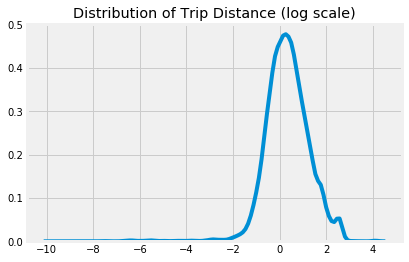

In [44]:
# We are plotting the distribution for Trip Distance
sns.kdeplot(np.log(df['trip_distance'].values)).set_title("Distribution of Trip Distance (log scale)")


Text(0.5, 1.0, 'Trip Distance vs Fare Amount')

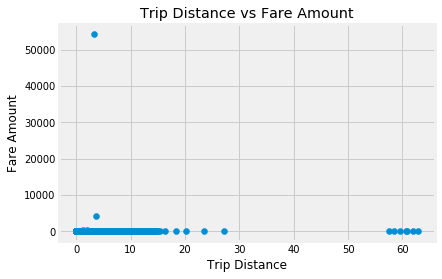

In [45]:
plt.scatter(x=df['trip_distance'],y=df['fare_amount'])
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs Fare Amount")

In [46]:
# Here we can see that even for distances are zero let's check for NA's 
df.isnull().values.sum()

84

In [47]:
df.isnull().any()

fare_amount                 True 
pickup_datetime             True 
pickup_longitude            False
pickup_latitude             False
dropoff_longitude           False
dropoff_latitude            False
passenger_count             True 
pickup_date                 True 
pickup_day                  True 
pickup_hour                 True 
Datetime                    False
pickup_latitude_round3      False
pickup_longitude_round3     False
dropoff_latitude_round3     False
dropoff_longitude_round3    False
is_pickup_JFK               False
is_dropoff_JFK              False
is_pickup_EWR               False
is_dropoff_EWR              False
is_pickup_la_guardia        False
is_dropoff_la_guardia       False
trip_distance               False
dtype: bool

In [48]:
print(df.isnull().sum())

fare_amount                 26
pickup_datetime             1 
pickup_longitude            0 
pickup_latitude             0 
dropoff_longitude           0 
dropoff_latitude            0 
passenger_count             54
pickup_date                 1 
pickup_day                  1 
pickup_hour                 1 
Datetime                    0 
pickup_latitude_round3      0 
pickup_longitude_round3     0 
dropoff_latitude_round3     0 
dropoff_longitude_round3    0 
is_pickup_JFK               0 
is_dropoff_JFK              0 
is_pickup_EWR               0 
is_dropoff_EWR              0 
is_pickup_la_guardia        0 
is_dropoff_la_guardia       0 
trip_distance               0 
dtype: int64


In [70]:
# Missing value Analysis
missing_val = pd.DataFrame(df.isnull().sum())
# Reset Index
missing_val = missing_val.reset_index()
# Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_Percentage'})
# Calculate Percentage
missing_val['Missing_Percentage'] = (missing_val['Missing_Percentage']/len(df))*100
missing_val

,Variables,Missing_Percentage
0,fare_amount,0.155608
1,pickup_datetime,0.006224
2,pickup_longitude,0.000000
3,pickup_latitude,0.000000
4,dropoff_longitude,0.000000
5,dropoff_latitude,0.000000
6,passenger_count,0.336114
7,pickup_date,0.006224
8,pickup_day,0.006224
9,pickup_hour,0.006224


In [76]:
# Sort in Descending Order
missing_val = missing_val.sort_values('Missing_Percentage', ascending = False).reset_index(drop = True)

,Variables,Missing_Percentage
0,passenger_count,0.336114
1,fare_amount,0.155608
2,pickup_datetime,0.006224
3,pickup_date,0.006224
4,pickup_day,0.006224
5,pickup_hour,0.006224
6,pickup_longitude,0.000000
7,pickup_latitude,0.000000
8,dropoff_longitude,0.000000
9,dropoff_latitude,0.000000


In [79]:
# Imputation with median 
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())


In [105]:
# For Imputing the Fare amount Let's us check the values for both mean and the median
print('Fare Amount mean and median',(df['fare_amount'].mean(),df['fare_amount'].median()))
# As the Median is low and we also observed in our histogram that most of the values lies under 10.00$. 
# Let's Impute, The Fare Amount with the mean
# Now we are left with just the date column, we know imputation won't be good idea for the date. So, we can remove that.
df = df.dropna(how='any',axis=0)
print(df.isnull().sum())

Fare Amount mean and median (15.005490196078272, 8.5)
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_date          0
pickup_day           0
pickup_hour          0
dtype: int64


In [109]:
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(df)

In [110]:
# Construct and return an Nx3 input matrix for our linear model
# using the travel vector, plus a 1.0 for a constant bias term.
def get_input_matrix(df):
    return np.column_stack((df.abs_diff_longitude, df.abs_diff_latitude, np.ones(len(df))))

train_X = get_input_matrix(df)
train_y = np.array(df['fare_amount'])

print(train_X.shape)
print(train_y.shape)

(16065, 3)
(16065,)


# Now let's use numpy's lstsq library function to find the optimal weight column  

In [113]:
# The lstsq function returns several things, and we only care about the actual weight vector w.

(w, _, _, _) = np.linalg.lstsq(train_X, train_y, rcond = None)
print(w)

[ 0.06742012 -0.0224985  14.99877496]


In [114]:
# These points pass a quick reality check, since we'd expect two values. The weights for the absolute longitude and latitude differences- to be positive, as more ditances should imply higher fare and we'd expect the bias term to loosly represent the costof a very short ride

In [115]:
# We would be able to Calculate OLS and also check for the seberity of multicollinearity.

In [117]:
w_OLS = np.matmul(np.matmul(np.linalg.inv(np.matmul(train_X.T, train_X)), train_X.T), train_y)
print(w_OLS)

[ 0.06742012 -0.0224985  14.99877496]
